<hr/>

# Programmation orientée objet

* Les concepts de la programmation orientée objet.

* Comment s'écrit une classe en Python

> Si une classe n'a qu'une fonction à part `__init__` c'est une fonction.

* Documentation des classes

* Attributs de classe et d'instance, les attributs `property`.

* Les méthodes spéciales (surcharge d'opérateurs,` __iter__`).

* L'héritage et la redéfinition de fonctions.





In [33]:
dir(list)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [111]:


class Pet:
    """The Pet class describses a pet animal
    
    """
    clinic = "Les toutous"

    
    def __init__(self, name, size, weight, species):
        """Creates a pet
        Parameters
        ----------
        name: str
        size : float
            the size in cm
    
        ...
        """
        self.name = name
        self.size = size
        self.weight = weight
        self.species = species
        self._bmi = self.weight / (0.01*self.size)**2
    
    def __str__(self):
        raise NotImplementedError
        
    
    
    def __mul__(self, other):
        if self.species != other.species:
            raise TypeError(f"can't cross {self.species} and {other.species}")
        
        return Pet(self.name[:3]+other.name[3:],
                   size=1,
                   weight=2,
                   species=self.species)
    
    @property
    def bmi(self):
        self._bmi = self.weight / (0.01*self.size)**2
        return self._bmi
    
    def eat(self, qty, conv=0.4):
        self.weight += qty * conv
        
    
    def walk(self, distance, conv=0.1):
        self.weight -= distance * conv
        

        
class Cat(Pet):
    
    def __init__(self, name, size, weight):
        super().__init__(name, size, weight, 'cat')
    
    @staticmethod
    def cry(n):
        print("miaou " * n)
    
    @classmethod
    def from_dict(cls, data_dict):
        return cls(**data_dict)
    
    def __str__(self):
        return f"Miaou miaou my name is {self.name}"


class Dog(Pet):
    def __init__(self, name, size, weight):
        super().__init__(name, size, weight, 'dog')
    
    def __str__(self):
        return f"Wouaf wouaf my name is {self.name}"


In [112]:
medor = Dog("Médor", 85, 10)

priscilla = Dog("Priscilla", 65, 6)

felix = Cat("Félix", 12, 3)

In [113]:
felix_data = {"name": "Félix", "size": 30, "weight": 4}

felix2 = Cat.from_dict(felix_data)


In [114]:
print(felix2)

Miaou miaou my name is Félix


In [86]:
felix.cry(12)

miaou miaou miaou miaou miaou miaou miaou miaou miaou miaou miaou miaou 


In [73]:
medor.clinic

'Les toutous'

In [74]:
Pet.clinic

'Les toutous'

In [68]:
print(medor)

Wouaf wouaf my name is Médor


In [69]:
print(felix)

Miaou miaou my name is Félix


In [70]:
milou = medor * felix

TypeError: can't cross dog and cat

In [43]:
print(milou)

Hello my name is Médscilla


In [44]:
from pathlib import Path

In [45]:
Path("/home") / Path('humancoders')

PosixPath('/home/humancoders')

In [1]:
data = [1, 1, 2]

In [2]:
dico = {"res": 12, "data": data}

In [3]:
data

[1, 1, 2]

In [4]:
dico['data']

[1, 1, 2]

In [5]:
dico['data'][0] = 100

In [6]:
data

[100, 1, 2]

In [7]:
import inspect

In [8]:
import sys

In [12]:
sys.getrefcount(dico['data'])

21

In [11]:
dico['data']

[100, 1, 2]

In [36]:
print(medor)

Hello my name is Médor


In [59]:
medor.eat(1)

In [63]:
medor.bmi

13.84083044982699

In [55]:
medor.bmi = 12

In [56]:
medor.bmi

12

In [41]:
medor.weight

10.4

In [42]:
medor.walk(10)

In [43]:
medor.weight

9.4

In [44]:
medor.bmi

13.010380622837372

In [138]:
import json
import subprocess

import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


from reporter.header import create_header

def graph_weather(weather_data, ax=None, save_to="graph.png"):
    
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.get_figure()

    ax.scatter(
        weather_data['temp'],
        weather_data['pressure'],
        c=weather_data["humidity"])
    fig.savefig(save_to)
    
    return fig, ax


    
class Generator:
    
    def __init__(self, authors_json_path, link):
        
        self.authors_json = authors_json_path
        self.link = link
        self.authors = self._parse_authors()
        self.data = self._parse_data()
        self.graph_path = None
        
    def _parse_authors(self):
        with open(self.authors_json, 'r') as fp:
            authors = json.load(fp)
        return authors

    def _parse_data(self):
        with requests.get(link) as response:
            content = json.loads(response.content)
        weather = pd.DataFrame(content['list'])
        weather_main = pd.DataFrame.from_records(weather['main'])
        return weather_main
        
    def make_graph(self, save_to='graph.png'):
        fig, ax = graph_weather(self.data, save_to=save_to)
        self.graph_path = save_to
    
    def make_md(self):
        header_str = create_header(self.authors)
        self.make_graph()
        md_text = header_str + f'\n\n![le temps]({self.graph_path})\n'
        
        with open("report.md", 'w', encoding='utf-8') as fp:
            fp.write(md_text)
        
    def convert_report(self, fmt='html', reset=False):
        if reset:
            self.make_md()
        subprocess.run(["pandoc", "report.md", "-o", f"report.{fmt}"])
        

In [139]:
link = "http://samples.openweathermap.org/data/2.5/forecast/hourly?id=524901&appid=b6907d289e10d714a6e88b30761fae22"
gen = Generator('authors.json', link)

/home/humancoders/miniconda3/lib/python3.7/site-packages/reporter-0.0.1-py3.7.egg/reporter/header.py:28: UserWarning: key "firstname" not found in {'lastname': 'Harisson', 'birth_year': 1943, 'instru': 'Bass'}
  warnings.warn(f'key "firstname" not found in {aut}')


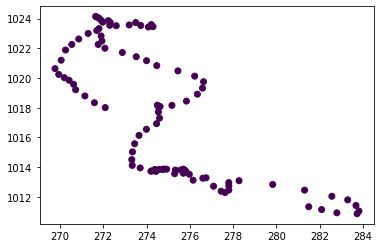

In [140]:
gen.make_md()

In [141]:
gen.convert_report()

In [143]:
subprocess.run(['firefox', "report.html"])

CompletedProcess(args=['firefox', 'report.html'], returncode=0)

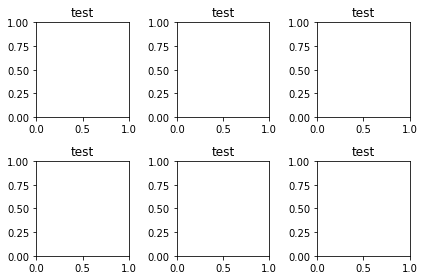

In [104]:
fig, axes = plt.subplots(2, 3,)
for ax in axes.ravel():
    ax.set_title("test")
fig.tight_layout()
fig.savefig('sxerz.png')

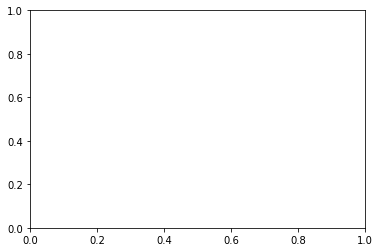

In [102]:
fig, ax = plt.subplots()
fig.savefig('sxerz.png')

Blagnac le 22/11/2019

### Auteurs

- John Lennon
- Paul McCartney

![la legende du graphe](graph.png)



In [ ]:
fig, ax = plt.subplots()
ax.plot()
fig.savefig('erqe.png')

In [119]:
import subprocess
cp = subprocess.run("pandoc report.md -o report.docx".split(), capture_output=True)

In [120]:
cp.stderr

b'pandoc: report.md: openBinaryFile: does not exist (No such file or directory)\n'

In [118]:
cp.stdout

## Décorateurs

In [1]:
import logging

logger = logging.getLogger('jupyter')
logger.setLevel('INFO')
handler = logging.FileHandler("jupyter.log")
logger.addHandler(handler)

In [2]:
logger.warning("Test logger")

In [5]:
def say_hello(name):
    logger.info('entering say_hello')
    print(f"Hello {name}")
    logger.info('exiting say_hello')
    
def say_bonjour(name):
    logger.info('entering say_bonjour')
    print(f"Bonjour {name}")
    logger.info('exiting say_bonjour')
    

In [4]:
say_hello("John")

Hello John


In [27]:
from functools import wraps

def log_call(fun):
    
    @wraps(fun)
    def decorated(*args, **kwargs):
        print(args)
        print(kwargs)
        logger.info(f'entering {fun.__name__}')
        print(f'entering {fun.__name__}')
        res = fun(*args, **kwargs)
        logger.info(f'exiting {fun.__name__}') 
        return res
    return decorated

def say_hello(name):
    print(f"Hello {name}")
    
@log_call
def say_bonjour(name):
    """Says bonjour"""
    print(f"Bonjour {name}")
    
@log_call    
def divide_by(num, by=10):
    return num/by
    

In [30]:
say_bonjour("Michel")

('Michel',)
{}
entering say_bonjour
Bonjour Michel


In [29]:
divide_by(12, by=4)

(12,)
{'by': 4}
entering divide_by


3.0

In [21]:
def arbitrary(*args, **kwargs):
    print("passed as args: ")
    print(args, '\n')
    
    print("passed as kwargs: ")
    print(kwargs, '\n')
    

In [24]:
arbitrary(1, 2, 3, v=12, qzer="tremplin")

passed as args: 
(1, 2, 3) 

passed as kwargs: 
{'v': 12, 'qzer': 'tremplin'} 



In [31]:
import matplotlib.pyplot as plt

In [32]:
plt.plot?

In [17]:
hello_decorated = log_call(say_hello)

In [18]:
hello_decorated('Pablo')

entering say_hello
Hello Pablo


In [19]:
say_bonjour('Marcel')

entering say_bonjour
Bonjour Marcel


In [20]:
say_bonjour?

> Exercice: Créer une classe `Generator` qui complète notre module créé plus haut 